In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image

imagedataset = str("C:/Users/DELL/archive2")

dataset_path = os.listdir(imagedataset)

image_types = os.listdir(imagedataset)
#print (room_types)  #what kinds of rooms are in this dataset

print("Types options found: ", len(dataset_path))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Types options found:  2


In [3]:
images = []

for item in image_types:
 # Get all the file names
 all_image = os.listdir(imagedataset + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for image in all_image:
    images.append((item, str(imagedataset + '/' + item) + '/' + image))
    #print(rooms[:1])


In [4]:
# Build a dataframe        
images_df = pd.DataFrame(data=images, columns=['image type', 'image'])
#print(images_df.head())
#print(images_df.tail())

In [5]:

# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(images_df))

image_count = images_df['image type'].value_counts()
print(image_count)

Total number of images in the dataset:  3000
no     1500
yes    1500
Name: image type, dtype: int64


In [6]:
import cv2
path = str("C:/Users/DELL/archive2/")


im_size = 300

images = []
labels = []

for i in image_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
    
print("Count for NO: ", labels.count("no"))
print("Count for YES: ", labels.count("yes"))

Count for NO:  1500
Count for YES:  1500


In [7]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape   

(3000, 300, 300, 3)

In [8]:
images = images.astype('float32') / 255.0

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=images_df['image type'].values
print(y[:5])

['no' 'no' 'no' 'no' 'no']


In [9]:

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

##y=y.reshape(-1,1)
##onehotencoder = OneHotEncoder(categories='auto')  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
##Y= onehotencoder.fit_transform(y)
##Y.shape  #(3000, 2)
##print(y[:3000])


[0 0 0 ... 1 1 1]


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(test_y)

(2850, 300, 300, 3)
(2850,)
(150, 300, 300, 3)
(150,)
[0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1
 1 0]


In [11]:
# Develop a sequential model using keras
import keras
import  tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 256)               69120256  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 69,120,770
Trainable params: 69,120,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compute the model parameters

#model.compile(optimizer=tf.train.Adam(),
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
MLP_model = model.fit(train_x,train_y, validation_data=(test_x, test_y), epochs=30)


Epoch 1/30
90/90 [==============================] - 52s 544ms/step - loss: 4.0262 - accuracy: 0.5053 - val_loss: 0.7077 - val_accuracy: 0.4667
Epoch 2/30
90/90 [==============================] - 47s 524ms/step - loss: 0.6953 - accuracy: 0.4933 - val_loss: 0.6911 - val_accuracy: 0.5333
Epoch 3/30
90/90 [==============================] - 53s 590ms/step - loss: 0.6959 - accuracy: 0.5116 - val_loss: 0.6932 - val_accuracy: 0.5333
Epoch 4/30
90/90 [==============================] - 46s 512ms/step - loss: 0.6968 - accuracy: 0.5074 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 5/30
90/90 [==============================] - 46s 511ms/step - loss: 0.6986 - accuracy: 0.4961 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 6/30
90/90 [==============================] - 45s 504ms/step - loss: 0.6997 - accuracy: 0.5109 - val_loss: 0.6972 - val_accuracy: 0.5333
Epoch 7/30
90/90 [==============================] - 48s 533ms/step - loss: 0.6970 - accuracy: 0.4975 - val_loss: 0.6950 - val_accuracy: 0.4667

In [15]:
Y_pred = np.argmax(model.predict(test_x),axis=1)
print(Y_pred)

5/5 [==============================] - 2s 210ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [26]:
#CHECKING MODEL WITH GRAPHICS

HistoryDict2 = MLP_model.history

val_losses = HistoryDict2["val_loss"]
val_acc = HistoryDict2["val_accuracy"]
acc = HistoryDict2["accuracy"]
losses = HistoryDict2["loss"]
epochs = range(1,len(losses)+1)

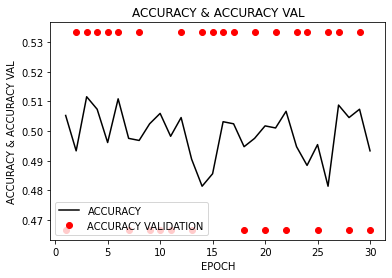

In [28]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


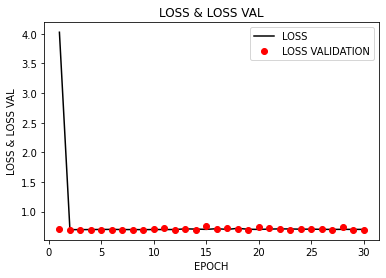

In [24]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<AxesSubplot:>

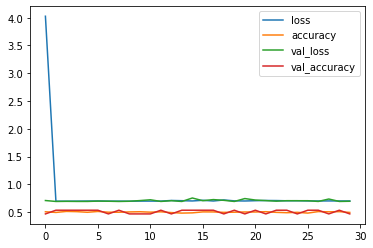

In [27]:
import pandas as pd
Dict_Summary = pd.DataFrame(MLP_model.history)
Dict_Summary.plot()

In [18]:
# Get the accuracy of test data set
#
test_loss, test_acc = model.evaluate(test_x, test_y)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

5/5 [==============================] - 1s 178ms/step - loss: 0.6945 - accuracy: 0.4667
Test Accuracy:  0.46666666865348816 
Test Loss:  0.6945310235023499


In [19]:
MLP_model.history['accuracy']

[0.5052631497383118,
 0.4933333396911621,
 0.5115789771080017,
 0.5073684453964233,
 0.49614036083221436,
 0.5108771920204163,
 0.4975438714027405,
 0.4968421161174774,
 0.5024561285972595,
 0.5059649348258972,
 0.49824562668800354,
 0.5045614242553711,
 0.49052631855010986,
 0.48140349984169006,
 0.48561403155326843,
 0.503157913684845,
 0.5024561285972595,
 0.49473685026168823,
 0.4975438714027405,
 0.5017544031143188,
 0.5010526180267334,
 0.5066666603088379,
 0.49473685026168823,
 0.4884210526943207,
 0.4954386055469513,
 0.48140349984169006,
 0.5087719559669495,
 0.5045614242553711,
 0.5073684453964233,
 0.4933333396911621]